> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="../images/shell-logo.png" width="50" height="50" align="right"/>

<img src="../images/di.png" width="50" height="50" align="right"/>

# Altering Dataframe

In [ ]:
# ! jupyter nbconvert Python_intro.ipynb --to slides --post serve

## Learning Objectives
- Module Introduction
- Introduction to Data Skew
- Working with Data Skew
- What is Column Pruning?
- De-Duplicating DataFrames
- Module Recap


### Introduction to Data Skew

A data is called as skewed when curve appears distorted or skewed either to the left or to the right, in a statistical distribution. In a normal distribution, the graph appears symmetry meaning that there are about as many data values on the left side of the median as on the right side. For example, below is the Height Distribution graph.

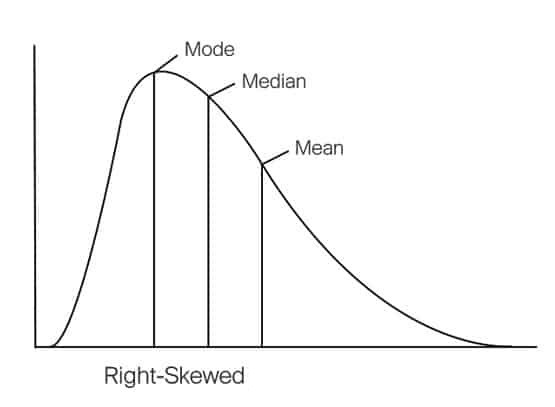

So in skewed data, the tail region may act as an **outlier for the statistical model** and we know that **outliers adversely affect the model’s performance especially regression-based models.** 

 ### Working with Skewed Data
 
Skewed data can be made more gaussian by **Power Transformations**. There are a variety of power transformations like : 

#### 1. Log Transformation

 A log transformation can help to fit a very skewed distribution into a Gaussian one. After log transformation we can easily see pattern in our data.
 
 

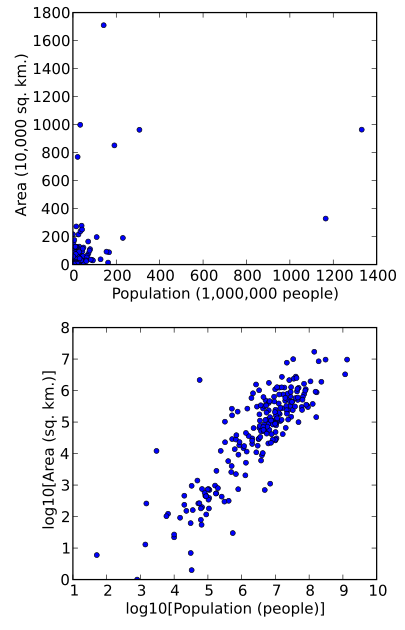

In the above image, you can clearly see the patterns after applying log transformation. Before that we have too many outliers present which may affect our model’s performance.

### There are other two popular approaches for such automatic power transforms; they are:

#### - Box-Cox Transform
#### - Yeo-Johnson Transform

The transformed training dataset can then be fed to a machine learning model to learn a predictive modeling task.


A hyperparameter, often referred to as lambda  is used to control the nature of the transform.

Below are some common values for lambda

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

The optimal value for this hyperparameter used in the transform for each variable can be stored and reused to transform new data in the future in an identical manner, such as a test dataset or new data in the future.

These power transforms are available in the scikit-learn Python machine learning library via the PowerTransformer class.

The class takes an argument named “method” that can be set to `yeo-johnson` or `box-cox` for the preferred method. It will also standardize the data automatically after the transform, meaning each variable will have a zero mean and unit variance. This can be turned off by setting the “standardize” argument to False.

We can demonstrate the PowerTransformer with a small worked example. We can generate a sample of random Gaussian numbers and impose a skew on the distribution by calculating the exponent. The PowerTransformer can then be used to automatically remove the skew from the data.

In [7]:
from numpy import exp
import pandas as pd
from sklearn.datasets import fetch_california_housing
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

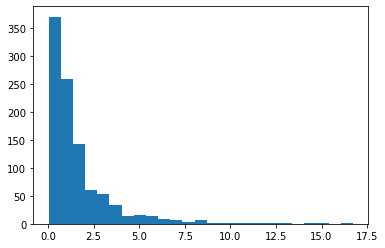

In [2]:
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()

In [3]:
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

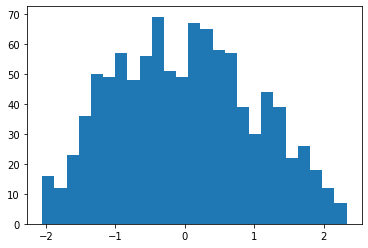

In [4]:
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

### Column Pruning
Column pruning is essentialy deleting the columns or dropping the not required columns.  

```python
df.drop(columns = ['columnheading1', 'columnheading2'], axis=1, inplace=True)
```



In [13]:
#Your Turn
df = fetch_california_housing(as_frame=True)['data']

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
#Drop Latitude and Longitude column



### De-Duplicating DataFrames
An important part of Data analysis is analyzing Duplicate Values and removing them. Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [17]:
# using the read_csv method of pandas we read file 
users = pd.read_csv('../data/user.tbl', sep='|')

In [18]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Length: 943, dtype: bool

In [19]:
users.duplicated().sum()    # Count of duplicates

0

In [20]:
users[users.duplicated()]   # Only show duplicates

,user_id,age,gender,occupation,zip_code


In [21]:
users.drop_duplicates()     # Drop duplicate rows

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [22]:
users.age.duplicated()      # Check a single column for duplicates

0      False
1      False
2      False
3       True
4      False
       ...  
938     True
939     True
940     True
941     True
942     True
Name: age, Length: 943, dtype: bool

In [23]:
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

13